In [13]:
 !pip install yake

In [1]:
import spacy
from keyphrase_vectorizers import KeyphraseCountVectorizer, KeyphraseTfidfVectorizer

In [ ]:
!pip install spacy

In [44]:
docs = ['[ADRESSE] .  \n---  \n[CODE_POSTAL] [VILLE]',
 'Le patient a été adressé pour une évaluation diagnostique et thérapeutique.',
 '\\- Lieu de vie : appartement\n\n\\- Vit en couple depuis 1 an et demi  \nEst étudiante en chinois en 3eme année mais absentéisme depuis février 2022 +\ntravaille comme vendeuse dans une boutique (arrêté), travaille actuellement\ncomme nounou le soir durant 3 heures. A commencé à décrocher depuis le\nconfinement de 2020.\n\n\\- Devait être en Chine cette année.  \nVeut devenir traductrice.  \nIsolement social',
 "\\- Pays de naissance : France\n\n\\- Langue maternelle : français\n\n\\- Profession des parents : mère : éducatrice dans un foyer pour enfants père\n: ?\n\n\\- Situation du couple parental : divorcés depuis 10 ans\n\n\\- Qualité des relations familiales : Mère, un frère de 20 ans et une soeur de\n24 ans plus jeunes dans le 95, bons rapports avec eux, peu de contacts avec\nson père.\n\n\\- Facteur de stress précoce : violences verbales (insultes, rabaissement) et\nphysiques quasi-quotidienne, contre sa mère et la patiente jusqu'à ses 16 ans.\nNotion d'hématomes. Notion d'une plainte portée à la police non aboutie. Il\naurait été interpellé plusieurs fois car il aurait tenté 2 fis de « tuer » sa\nmère, qui aurait dit « ton père a essayé de me tuer, qu'est-ce que tu aurais\nfait s'il l'avait fait ». Le père partait souvent du domicile au cours de\ndisputes.\n\n\\- Les enfants allaient souvent chez la tante au cours des disputes, le père\ninsultait la mère de tous les noms à ce moment-là. Notion d'un épisode où la\npatiente est tombée en panne sur la nationale, le père aurait refusé de venir\nla chercher et l'insultait.",
 "\\- Grossesse ? N'a pas son carnet de santé.\n\n  * Accouchement ?\n  * Voie, terme ?\n  * Complications (infection, diabète gestationnel, MAP, HTA, pré-éclampsie) ?\n  * Prise de traitements médicamenteux ou de toxiques ?\n  * Age des parents : mère : 26 ans et père : 30 ans\n\n\\- Mensurations de naissance : ?\n\n  * Poids de Naissance : ?\n  * Taille de Naissance : ?\n  * Périmètre Crânien de Naissance : ?\n  * Apgar : ?\n\n\\- Ictère néo-natal (photothérapie) : ?\n\n\\- Allaitement maternel/artificiel/mixte: ?\n\n\\- Croissance staturo-pondérale : ?\n\n\\- Acquisitions précoces :\n\n  * Marche : pas de retard\n  * Langage : pas de retard\n  * Propreté : ?\n  * Développement psychomoteur : pas de retard\n  * Comportement : pleurait souvent, agitée.\n\n\\- Sommeil : ?\n\n\\- Alimentation (sélectivité, restriction) : ?\n\n\\- Motricité :\n\n  * Globale (extraction d'un manège, vélo) : acquisition du vélo plus tard à 11-12 ans, reste difficile, peur de tomber.\n  * Fine (stylo) : pas de retard.\n\n\\- Infections récidivantes (ex. otites, dépistage surdité) : non\n\n\\- Antécédents médico-chirurgicaux avant entrée à l'école : non",
 "\\- Bilan, consultation ou suivi psychiatrique :\n\n  * Une consultation au CPOA le 13/03/2022.\n  * TCA ancien à type de boulimie depuis l'âge de 12 ans, calculait les calories, faisait beaucoup de sport, pas de conduite de purge.\n\n\\- Bilan, consultation ou suivi psychologique :\n\nAucune\n\n\\- Bilan, consultation ou suivi paramédical (orthophonie, psychomotricité,\nergothérapie...)\n\nAucun\n\n\\- Hospitalisation pour motif psychiatrique :\n\nJamais\n\n\\- Antécédents d'idées suicidaires :\n\nOui la première fois vers 16-17 ans, avec scénario de précipitation sous le\ntrain, s'enfoncer un couteau dans le ventre, hebdomadaire, à ce moment, elle\ncriait, pleurait, se sentait impuissante.\n\n\\- Antécédents de passage à l'acte auto-agressif (en dehors des tentatives de\nsuicide) :",
 '* Aucun',
 'RAS',
 'Non',
 '\\- Tabac :\n\n  * Occasionnel\n  * A déjà eu une consommation quotidienne de 10 cig/jour pendant un mois puis arrêt.\n\n\\- Alcool :\n\n  * Date et âge de la première consommation : : 19-20 ans\n  * **Consommation plus importante durant 2-3 ans, tous les 2-3 jours, plutôt de la bière, 4-5 x 50 cl à but anxiolytique et festif, buvait en société, sortait beaucoup.**\n  * Consommation actuelle : occasionnelle, boit quand elle ne se sent pas bien.\n  * Pas de coma éthylique, pas de DT, pas de crise comitiale.\n  * \n\n\\- Cannabis :\n\n  * Non\n\n\\- Autre toxique :\n\n  * Non',
 "Tante maternel : diabète\n\nOncle maternel : décédé d'un cancer.",
 "Mère : EDC suivi par un psychiatre et sous ADP.\n\nPère : **notion de TB sur de grandes variations d'humeur posé par le médecin\ntraitant.**\n\nPas de TS, pas de schizophrénie, pas de TB.",
 "Rapporte des crises évoluant depuis son adolescence. Contexte de violences\nphysiques de la part du père sur la patiente et sa mère. Actuellement, ces\ncrises sont déclenchées par un mot, une phrases qui ne lui a pas plu, un\nmanque d'attention de l'autre à son égard. Ces crises sont imprévisibles, **se\ndéclenchent de façon abrupte et sont caractérisées par des pleurs, des idées\nnoires sans scénario suicidaire, elle se laisse tomber par terre, tape les\nmurs, se frappe avec le poing sur les cuisses, le visage et se provoque des\nhématomes superficiels et se sent perdue.** Elle évoque aussi un vécu de",
 'A noté, un avortement à 1 mois de grossesse en janvier 2022, bien passé.',
 "Seule\n\n\\- Présentation soignée\n\n\\- Expression adaptée, peu de participation émotionnelle, semble un peu\npassive.\n\n\\- Bon contact.\n\n\\- Comportement calme.\n\n\\- Discours clair et cohérent.\n\n\\- Pensée construite et sructurée.\n\n\\- Actuellement :**thymie basse** , tristesse de l'humeur depuis des années,"]

In [56]:
nlp = spacy.load("fr_dep_news_trf")


def print_token_attributes(doc):
    for token in doc:
        print(
            f"Token: {token.text}\n"
            f"Lemma: {token.lemma_}\n"
            f"POS: {token.pos_}\n"
            f"Tag: {token.tag_}\n"
            f"Dependency: {token.dep_}\n"
            f"Shape: {token.shape_}\n"
            f"Is Alpha: {token.is_alpha}\n"
            f"Is Stop: {token.is_stop}\n"
            "-----------------------"
        )

for idx, doc_text in enumerate(docs):
    #print(f"Document {idx + 1}:\n")
    doc = nlp(doc_text)
    #print_token_attributes(doc)
    #print("\n")

def remove_stopwords(text):
    doc = nlp(text)
    filtered_text = " ".join(token.text for token in doc if not token.is_stop)
    return filtered_text

fitred_docs=[]
for doc in docs:
    filtered_text = remove_stopwords(doc)
    fitred_docs.append(filtered_text)


In [57]:
vectorizer1 = KeyphraseCountVectorizer(spacy_pipeline=nlp,pos_pattern='<ADJ.*>*<DET.*>*<NOUN.*>+<ADJ.?>')
vectorizer2 = KeyphraseTfidfVectorizer(spacy_pipeline=nlp,pos_pattern='<ADJ.*>*<DET.*>*<NOUN.*>+<ADJ.*>+')

# the following calls use the nlp object
vectorizer1.fit(docs)
vectorizer2.fit(docs)

KeyphraseTfidfVectorizer(pos_pattern='<ADJ.*>*<DET.*>*<NOUN.*>+<ADJ.*>+',
                         spacy_pipeline=<spacy.lang.fr.French object at 0x42ef0ec50>)

In [58]:
# After learning the keyphrases, they can be returned.
keyphrases = vectorizer1.get_feature_names_out()
print(keyphrases)

['couple parental' 'antécédents médico-chirurgicaux' 'suivi psychiatrique'
 'façon abrupte' 'consommation actuelle' 'idées suicidaires'
 'hématomes superficiels' 'acquisitions précoces' 'suivi paramédical'
 'coma éthylique' 'tante maternel' 'discours clair' 'croissance staturo'
 'violences verbales' 'développement psychomoteur' 'but anxiolytique'
 'langue maternelle' 'diabète gestationnel' 'une consommation quotidienne'
 "l' acte auto-agressif" 'ictère néo-natal' 'motif psychiatrique'
 'scénario suicidaire' 'crise comitiale' 'allaitement maternel'
 'relations familiales' 'présentation soignée'
 'participation émotionnelle' 'traitements médicamenteux'
 'comportement calme' 'thymie basse' 'isolement social'
 'une évaluation diagnostique' 'stress précoce' 'périmètre crânien'
 'tca ancien' 'suivi psychologique' 'oncle maternel'
 'infections récidivantes']


In [59]:
keyphrases = vectorizer2.get_feature_names_out()
print(keyphrases)

['couple parental' 'antécédents médico-chirurgicaux' 'suivi psychiatrique'
 'façon abrupte' 'consommation actuelle' 'idées suicidaires'
 'hématomes superficiels' 'acquisitions précoces' 'suivi paramédical'
 'coma éthylique' 'tante maternel' 'discours clair' 'violences verbales'
 'développement psychomoteur' 'but anxiolytique' 'langue maternelle'
 'diabète gestationnel' 'une consommation quotidienne'
 "l' acte auto-agressif" 'ictère néo-natal' 'motif psychiatrique'
 'scénario suicidaire' 'crise comitiale' 'allaitement maternel'
 'relations familiales' 'présentation soignée'
 'participation émotionnelle' 'traitements médicamenteux'
 'comportement calme' 'thymie basse' 'isolement social'
 'une évaluation diagnostique' 'stress précoce' 'périmètre crânien'
 'tca ancien' 'suivi psychologique' 'croissance staturo - pondérale'
 'oncle maternel' 'infections récidivantes']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oaouina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['30 ans \\- mensurations', 'non \\- antécédents médico', 'chirurgicaux avant entrée', '\\- infections récidivantes', '\\- ictère néo', '\\- croissance staturo', '\\- allaitement maternel', '\\- acquisitions précoces', 'vélo plus tard', '\\- sommeil', '\\- motricité', '\\- grossesse', '\\- alimentation', '26 ans', '12 ans', 'traitements médicamenteux', 'reste difficile', 'périmètre crânien', 'pleurait souvent', 'développement psychomoteur', 'dépistage surdité', 'diabète gestationnel', 'non', 'vélo', 'école', 'éclampsie', 'voie', 'toxiques', 'tomber', 'terme', 'taille', 'sélectivité', 'stylo', 'santé', 'retard', 'retard', 'retard', 'retard', 'restriction', 'père', 'pré', 'propreté', 'prise', 'pondérale', 'poids', 'photothérapie', 'peur', 'parents', 'otites', 'natal', 'naissance', 'naissance', 'naissance', 'naissance', 'mère', 'mixte', 'marche', 'map', 'manège', 'langage', 'infection', 'hta', 'globale', 'fine', 'extraction', 'ex', 'comportement', 'complications', 'carnet', 'artificiel', 

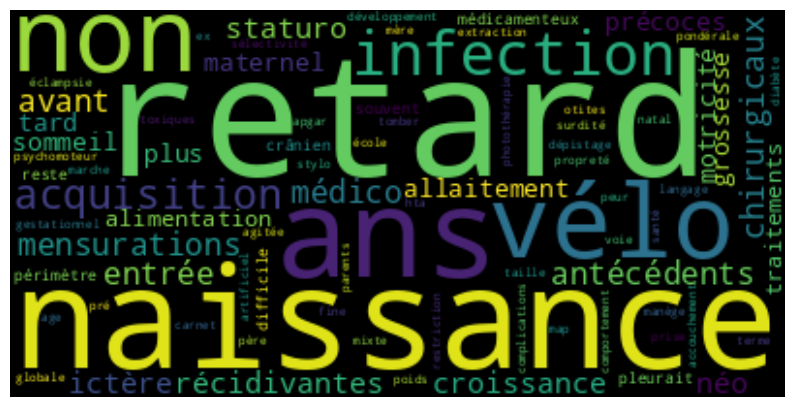

In [76]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('french')

# Importing libraries
from rake_nltk import Rake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
  
# Initializing the Rake instance
rake = Rake(language='fr',stopwords=stoplist)
# Extracting keywords and phrases
rake.extract_keywords_from_text(docs[4])
keywords = rake.get_ranked_phrases()
  
# Displaying the keywords
print(keywords)
  
# Generate WordCloud
wordcloud = WordCloud().generate(' '.join(keywords))
  
# Display the WordCloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
import yake

language = "fr"
max_ngram_size = 4
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)


for doc in fitred_docs:
    keywords = custom_kw_extractor.extract_keywords(doc)
    for kw in keywords:
        print(kw)




('ADRESSE', 0.030396371632413578)
('CODE', 0.030396371632413578)
('POSTAL', 0.030396371632413578)
('VILLE', 0.030396371632413578)
('adressé évaluation diagnostique thérapeutique', 0.005801314874236189)
('patient été adressé évaluation', 0.01655915082773619)
('évaluation diagnostique thérapeutique', 0.016559150827736194)
('adressé évaluation diagnostique', 0.03339840940482845)
('patient été adressé', 0.04940384002065631)
('diagnostique thérapeutique', 0.04940384002065631)
('adressé évaluation', 0.09700399286574239)
('évaluation diagnostique', 0.09700399286574239)
('patient', 0.15831692877998726)
('thérapeutique', 0.15831692877998726)
('adressé', 0.29736558256021506)
('évaluation', 0.29736558256021506)
('diagnostique', 0.29736558256021506)
('travaille actuellement nounou soir', 0.0004761799289955154)
('Veut devenir traductrice', 0.0011824357781851924)
('Devait Chine année', 0.0014424648202045595)
('commencé décrocher confinement', 0.002103662373177563)
('travaille vendeuse boutique', 0.0

In [78]:
text = """MODE DE VIE

-          Lieu de vie : Chez son père, sa mère habite dans le sud

-          Avec : son père

-          Scolarité et activité professionnelle : année de formation en candidat libre en informatique

-          Situation sociale et amoureuse : --

-          Activités de loisirs : Sport (course à pied) lecture, théâtre, écriture (poésie)

-          Ressources financières actuelles : parents

-           

BIOGRAPHIE

-          Pays de naissance : Fr

-          Langue maternelle : Fr

-          Profession des parents : Père dans le milieu du cinéma (décor) actuellement chauffeur

-          Situation du couple parental : divorcé (séparé depuis que [PERSONNE] a 3ans)

-          Qualité des relations familiales : Bonne

-          Fratrie : Une demie sœur d'une précédente union du côté maternel, puis 2ème d'une fratrie de 3 garçons

-          Facteur de stress précoce : séparation houleuse des parents avec violences physiques et verbales intra conjugales (jamais sur les enfants), accident de voiture du petit frère qui s'est fait rouler sur la jambe

 

DEVELOPPEMENT à compléter avec le carnet de santé

-          Grossesse

Accouchement :
Voie, terme :
Complications (infection, diabète gestationnel, MAP, HTA, pré-éclampsie)
Prise de traitements médicamenteux ou de toxiques
Age des parents :
-          Mensurations de naissance :

Poids de Naissance :
Taille de Naissance :
Périmètre Crânien de Naissance :
Apgar :
-          Ictère néo-natal (photothérapie) :

-          Allaitement maternel/artificiel/mixte:

-          Croissance staturo-pondérale :

-          Acquisitions précoces :

Marche :
Langage :
Propreté :
Développement psychomoteur :
Comportement :  
-          Sommeil :

-          Alimentation (sélectivité, restriction) :

-          Motricité :

Globale (extraction d'un manège, vélo) :
Fine (stylo) :
-          Infections récidivantes (ex. otites, dépistage surdité) :

-          Antécédents médico-chirurgicaux avant entrée à l'école :

 

SCOLARITE/FORMATION

-          Mode de garde avant maternelle : mère au foyer

-          Maternelle :

Age de la rentrée : 2 ans et demi
Nombre d'établissement 2
Acquisition : bonne
Comportement : RAS
Socialisation : RAS
-          Primaire :

Nombre d'établissement : 1
Acquisition :RAS
Comportement : RAS
Socialisation : RAS
-          Collège :

Nombre d'établissement : 1
Résultats : bon
Brevet : obtenu mention TB
Comportement : un peu d'insolence, début des consommations de cannabis
Socialisation : bonne
-          Lycée :

Nombre d'établissement : 1
Résultats : bons
Orientation : plutôt littéraire
Baccalauréat mention TB
Comportement : souvent repris pour absentéisme, en parallèle d'une majoration des consommations de cannabis en seconde et première, quotidiennes, entre 1 et 5 joints par jour. Arrêt en terminale pour se concentrer sur le bac.
Socialisation : bonne
-          Enseignement supérieur

L1 de sociologie
Hypokhagne 1 année à Orléans, début des symptômes suite à une agression, contexte de consommation de toxiques variés
L1 en sciences politique
Formation non diplômante en informatique
 

ANTECEDENTS PSYCHIATRIQUES PERSONNELS

-          Bilan, consultation ou suivi psychiatrique :

Jamais
 

-          Bilan, consultation ou suivi psychologique :

Jamais
 

-          Bilan, consultation ou suivi paramédical (orthophonie, psychomotricité, ergothérapie...)

Jamais
 

-          Consultation aux urgences pour un motif psychiatrique :

Mentionné dans le courrier d'admission de la sœur, mais non abordé par le patient en consultation
 

-          Hospitalisation pour motif psychiatrique : 0

 

-          Antécédents d'idées suicidaires : réfute tout ATCD d'idées suicidaires

 

-          Antécédents de passage à l'acte auto-agressif (en dehors des tentatives de suicide) : 0

 

-          Antécédents de tentatives de suicide :  aurait fait une TS à Orléans suite à son agression, à réévaluer plus tard car contourne la question

 

-          Recherches de comportements impulsifs/à risque (vitesse, AVP, fugues etc):

 

Depuis plusieurs mois, tendance à disparaître du domicile familial pendant 24 - 48h et revient en état d'incurie sans savoir bien expliquer ce qu'il a fait. Explique qu'il part faire une course, et qu'en chemin il croise une personne, qu'il va suivre, souvent un SDF, puis « se laisse porter au gré des opportunités » et reviens 48h après.
 

 

HISTORIQUE DU TRAITEMENT

Escitalopram prescrit par son MG, mauvaise observance, quelques mois en 2021. A priori 10mg.
 

ANTECEDENTS MEDICO-CHIRURGICAUX PERSONNELS

 

 

ALLERGIES MEDICAMENTEUSES

 

 

TOXIQUES à réévaluer

-          Tabac :

-          Alcool :

-          Cannabis :environ 2 fois dans le mois, « si on m'en propose »

-          Autre toxique :

A 20ans lorsqu'il était à Orléans, consommations variées, acides, amphétamines, psychostimulants, beaucoup d'alcool ayant occasionné des « moments d'absence » notamment un évènement au cours duquel il a été victime d'agression sexuelle (par les amis de sa copine de l'époque)
 

ANTECEDENTS FAMILIAUX SOMATIQUES à redemander

 

ANTECEDENTS FAMILIAUX PSYCHIATRIQUES

-          Grand oncle maternel : schizophrénie

-          Tante : trouble bipolaire à vérifier

-          Mère : épisodes dépressifs

-          Père : consommations de drogues

 

TRAITEMENTS ACTUELS

Aucun

 

HISTOIRE DE LA MALADIE

 

Les premiers symptômes semblent dater de son année de prépa Hypokhâgne à Orléans.

Relation de couple compliquée, beaucoup de consommations de toxique.

Une agression sexuelle

Quelques réactions paranoïaques lors des consommations de cannabis.

Puis progressivement apparition d'idées délirantes :

-          Crainte qu'on ait mis « quelque chose » dans son corps, de la drogue, ou une puce, qui expliquerait ses douleurs. Critique partielle

-          Crainte de « site espion » sur l'ordinateur, a fait la formation informatique justement pour cela. Certitude d'être surveillé. Peur d'avoir facilité des actes malveillant en se connectant sur certains sites (pornos, notamment).

-          Peur qu'on se soit introduit chez lui endant son sommeil pour lui faire des injections d'hormones ou de GHB (car parmis ses agresseurs, certains auraient été en cours de transition)

 

Rapporte une difficulté à être stable, le fait qu'il change de cursus, d'avoir des douleurs somatiques inexpliquées.

 

 

PREMIER ENTRETIEN/CONCLUSION

Seul(e)/accompagné(e)

-          Présentation correcte

-          Expression normale

-          Contact mi séducteur mi anxieux, réticent à parler du contenu de sa pensée

-          Comportement séducteur, calme, pas très adapté dans la distance

-          Discours parfois hermétique, diffluent

-          Pensée : patient réticent, semble parasité pendant l'entretien mais difficile d'accès. Tendance à érotiser les relations.

-          Euthymique

-          Anxiété : rapporte des ruminations anxieuses vespérales avec beaucoup de regrets

-          Concentration/attention/fonctions mnésiques : chute nette du fonctionnement

-          Sommeil : correct selon le patient

-          IDN/IDS 0

LA sœur est finalement plus informative, elle rapporte une grande inquiétude familiale sur l'agravation depuis quelques mois des symptômes de son frère avec notamment :

-          Repli au domicile

-          Clinophilie

-          Idées délirantes, très interprétatif avec idées de référence (pense que l'on parle de lui sur certains blogs, que des photos ont été prises à son insu), persécution

-          Discours hermétique

-          Moments « d'absence » et fugues

 

-          Au total, l'hypothèse clinique est la suivante : début de schizophrénie

Dans ce contexte :

-          les bilans proposés sont les suivants : BS, EEG, IRM, CAARMS

-          le traitement proposé est le suivant
F 20.11
""".lower()  # Spelling errors intentional.





In [79]:
#!pip install KeyBERT

In [80]:
from keybert import KeyBERT
from flair.embeddings import TransformerDocumentEmbeddings

# Init KeyBERT
kw_model = KeyBERT(model=TransformerDocumentEmbeddings('camembert-base'))
kw_model.extract_keywords(docs=docs, vectorizer=KeyphraseCountVectorizer(spacy_pipeline='fr_dep_news_trf', pos_pattern='<ADJ.?>*<NOUN.*>+<ADJ.?>', stop_words='french'))


[[],
 [('évaluation diagnostique', 0.9261)],
 [('isolement social', 0.8796)],
 [('violences verbales', 0.7978),
  ('langue maternelle', 0.7755),
  ('relations familiales', 0.7682),
  ('stress précoce', 0.7629),
  ('couple parental', 0.7072)],
 [('acquisitions précoces', 0.8437),
  ('infections récidivantes', 0.83),
  ('allaitement maternel', 0.8167),
  ('développement psychomoteur', 0.8066),
  ('traitements médicamenteux', 0.7914)],
 [('idées suicidaires', 0.83),
  ('suivi paramédical', 0.8299),
  ('suivi psychologique', 0.8123),
  ('suivi psychiatrique', 0.8017),
  ('tca ancien', 0.7902)],
 [],
 [],
 [],
 [('coma éthylique', 0.8389),
  ('crise comitiale', 0.8006),
  ('consommation actuelle', 0.7993),
  ('consommation quotidienne', 0.7962),
  ('but anxiolytique', 0.781)],
 [('oncle maternel', 0.9345), ('tante maternel', 0.9172)],
 [],
 [('hématomes superficiels', 0.8072),
  ('scénario suicidaire', 0.7711),
  ('façon abrupte', 0.6169)],
 [],
 [('discours clair', 0.8311),
  ('présentatio

In [81]:
# Init vectorizer for the German language
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='fr_dep_news_trf', pos_pattern='<ADJ.*>*<DET.*>*<NOUN.*>+<ADJ.*>*')

# Get German keyphrases
kw_model.extract_keywords(docs=docs, vectorizer=vectorizer)

[[('adresse', 0.886)],
 [('le patient', 0.933), ('une évaluation diagnostique', 0.9238)],
 [('absentéisme', 0.882),
  ('isolement social', 0.8796),
  ('une boutique', 0.8662),
  ('3eme année', 0.8649),
  ('le soir', 0.8556)],
 [('violences verbales', 0.7978),
  ('un frère', 0.7935),
  ('sa mère', 0.7898),
  ('plusieurs fois', 0.7885),
  ('hématomes', 0.788)],
 [('acquisitions précoces', 0.8437),
  ('dépistage surdité', 0.8303),
  ('infections récidivantes', 0.83),
  ('antécédents', 0.8212),
  ('accouchement', 0.818)],
 [('idées suicidaires', 0.83),
  ('suivi paramédical', 0.8299),
  ('antécédents', 0.8167),
  ('hospitalisation', 0.813),
  ('suivi psychologique', 0.8123)],
 [],
 [],
 [],
 [('coma éthylique', 0.8389),
  ('une consommation quotidienne', 0.8239),
  ('première consommation', 0.8087),
  ('crise comitiale', 0.8006),
  ('consommation actuelle', 0.7993)],
 [('un cancer', 0.9513),
  ('oncle maternel', 0.9345),
  ('tante maternel', 0.9172),
  ('diabète', 0.876)],
 [('grandes vari

In [82]:
keyphrases = vectorizer1.get_feature_names_out()
print(keyphrases)

['couple parental' 'antécédents médico-chirurgicaux' 'suivi psychiatrique'
 'façon abrupte' 'consommation actuelle' 'idées suicidaires'
 'hématomes superficiels' 'acquisitions précoces' 'suivi paramédical'
 'coma éthylique' 'tante maternel' 'discours clair' 'croissance staturo'
 'violences verbales' 'développement psychomoteur' 'but anxiolytique'
 'langue maternelle' 'diabète gestationnel' 'une consommation quotidienne'
 "l' acte auto-agressif" 'ictère néo-natal' 'motif psychiatrique'
 'scénario suicidaire' 'crise comitiale' 'allaitement maternel'
 'relations familiales' 'présentation soignée'
 'participation émotionnelle' 'traitements médicamenteux'
 'comportement calme' 'thymie basse' 'isolement social'
 'une évaluation diagnostique' 'stress précoce' 'périmètre crânien'
 'tca ancien' 'suivi psychologique' 'oncle maternel'
 'infections récidivantes']


In [83]:
import re
def find_chunks_with_regex(text, chunk):
    matched_spans = []

    pattern = re.compile(chunk, re.IGNORECASE)
    for match in re.finditer(pattern, text.lower()):
            start, end = match.span()
            matched_text = text[start:end]
            matched_spans.append((matched_text, start, end))


    return matched_spans

In [84]:
list_matches=[]
for kp in keyphrases:
        print(find_chunks_with_regex(docs[0],kp))
        list_matches.extend(find_chunks_with_regex(docs[0],kp))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [85]:
# Init vectorizer for the German language
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='fr_dep_news_trf', pos_pattern='<VERB.*>*<DET.?>*<NOUN.*>*<ADJ.?>')

# Get German keyphrases
kw_model.extract_keywords(docs=docs, vectorizer=vectorizer)

[[],
 [('une évaluation diagnostique', 0.9238), ('thérapeutique', 0.8963)],
 [('isolement social', 0.8796), ('3eme', 0.8569)],
 [('violences verbales', 0.7978),
  ('langue maternelle', 0.7755),
  ('relations familiales', 0.7682),
  ('stress précoce', 0.7629),
  ('bons', 0.7408)],
 [('acquisitions précoces', 0.8437),
  ('infections récidivantes', 0.83),
  ('allaitement maternel', 0.8167),
  ('développement psychomoteur', 0.8066),
  ('traitements médicamenteux', 0.7914)],
 [('idées suicidaires', 0.83),
  ('suivi paramédical', 0.8299),
  ('sentait impuissante', 0.8184),
  ('suivi psychologique', 0.8123),
  ('suivi psychiatrique', 0.8017)],
 [('aucun', 0.9716)],
 [],
 [],
 [('eu une consommation quotidienne', 0.8399),
  ('coma éthylique', 0.8389),
  ('crise comitiale', 0.8006),
  ('consommation actuelle', 0.7993),
  ('la première', 0.7966)],
 [('oncle maternel', 0.9345), ('tante maternel', 0.9172)],
 [('de grandes', 0.8004), ('traitant', 0.7841)],
 [('hématomes superficiels', 0.8072),
  ('

In [28]:
text = """Compte-Rendu d’Hospitalisation de
<nom /> HALLARY

Née le 1er aout 2256

adresse : 3 bis <rue /> <CP /> PARIS

n° Sécurité Sociale :

Date de rédaction : 24 MAI 2293

Unité fonctionnelle : Docteur <nom />.
Interne : <nom /> MOUAFFAK

Date d’entrée : 5 avril 2293.
Date de sortie : 20 mai 2293

Destinataire(s) :
Dr <nom /> 14/20 <rue /> <CP /> PARIS.

MODALITE D’HOSPITALISATION
HL Adressée par : le Docteur <nom />

MOTIF D’HOSPITALISATION
Patiente hospitalisée via le CMP à la demande du Docteur <nom /> pour
bilan et ajustement thérapeutique.

BIOGRAPHIE
Parents retraités vivant en <ville />.
Deuxième d’une fratrie de trois (deux frères).
Vit maritalement depuis plusieurs années.
Un fils <prenom />, âgée de 3 ans.
En invalidité depuis trois ans, madame <nom /> est diplômée en
comptabilité, métier qu’elle a exercé avant le début de sa maladie.

ANTECEDENTS MEDICOCHIRURGICAUX PERSONNELS
Endométriose cause de stérilité pendant 5 ans, traitée par voie
cœlioscopie.

ANTECEDENTS PSYCHIATRIQUES PERSONNELS
Début des troubles en janvier 2287 par un premier épisode psychotique traité
en ambulatoire par Haldol et Nozinan, avec persistance au décours d’un
important syndrome déficitaire.
Rechute psychotique en mars 2290 dans un contexte de rupture thérapeutique
et de post partum, compliqué d’un passage à l’acte autolytique.
Stabilisation sous Léponex à 425 mg par jour et suivi assuré au CMP par le.
Docteur <nom />

ANTECEDENTS FAMILIAUX
Frère psychotique suivi par le Docteur <nom /> au CMP de la Garenne
<ville />.

HISTOIRE DE LA MALADIE
Hospitalisation par le Docteur <nom /> de Madame <nom /> qui suite à
l’évolution déficitaire de sa maladie, s’est retrouvée en perte quasi-
totale d’autonomie et à la charge de son compagnon et de sa belle-mère.

EXAMEN A L’ENTREE
Patient incurique, angoissée.
Mâchonnement. Contact superficiel, affects abrasés.
Discours pauvre stéréotypé.
Pas d’activité délirante verbalisée.

EVOLUTION DANS LE SERVICE
Diminution des doses de Léponex jusqu’à 200 mg par jour ans le but
d’atténuer la sédation de la patiente et d’améliorer ses fonctions
cognitives.
Survenue d’un épisode infectieux broncho-pulmonaire prolongeant la durée de
l’hospitalisation.
Sous 200 mg de Léponex par jour, persistance du même tableau déficitaire
avec, cependant, en fin d’hospitalisation, net apaisement de l’angoisse.

PROJET DE SERVICE
Suivi ambulatoire par : le Docteur <nom />

Patiente confiée à sa famille (à sa mère pour un séjour de convalescence en
<ville />).
Hôpital de jour <prenom /> <rue />.
Accueil au CATTP.

EXAMENS COMPLEMENTAIRES
Bilan biologique standard : RAS.
Pharmacocinétique particulière du Léponex (à évaluer en ambulatoire : le
Docteur <nom /> doit nous en préciser les modalités).

AU TOTAL
Evolution déficitaire d’une schizophrénie désorganisée chez une patiente de
36 ans.

Une information concernant le motif d’hospitalisation, les indications
ainsi que les effets indésirables éventuels des examens complémentaires,
des traitements et de leurs implications a été donnée au patient ou à sa
famille.

TRAITEMENT DE SORTIE
CLOZAPINE 200 mg par jour.
ATARAX 100 mg 1- 0 – 1.
FORLAX sachet 1 par jour si constipation

DIAGNOSTIC
F 20.11
"""  # Spelling errors intentional.




In [33]:
#!pip install spaczz

In [34]:
import spacy
from spaczz.matcher import SimilarityMatcher
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

file_path="/Users/oaouina/Applications/pythonProject/KeyphraseVectorizers/annotation_art1.txt"
# Read the lines from the text file and put them into a list
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Remove leading and trailing whitespace from each line and create the list
entities_list = [line.strip() for line in lines]

nlp = spacy.load("fr_core_news_lg")
doc = nlp(text)

matcher = PhraseMatcher(nlp.vocab, attr="LEMMA")

# Iterate over the patterns and add them to the Matcher
for pattern in entities_list:
    matcher.add("ENTITY", [nlp(pattern.lower())])

In [35]:
matches = matcher(doc)
matches

[(17590775310403619837, 2, 3),
 (17590775310403619837, 44, 46),
 (17590775310403619837, 100, 101),
 (17590775310403619837, 106, 108),
 (17590775310403619837, 115, 116),
 (17590775310403619837, 117, 118),
 (17590775310403619837, 118, 119),
 (17590775310403619837, 124, 125),
 (17590775310403619837, 135, 137),
 (17590775310403619837, 136, 137),
 (17590775310403619837, 141, 142),
 (17590775310403619837, 142, 143),
 (17590775310403619837, 151, 153),
 (17590775310403619837, 152, 153),
 (17590775310403619837, 152, 154),
 (17590775310403619837, 157, 158),
 (17590775310403619837, 169, 170),
 (17590775310403619837, 181, 183),
 (17590775310403619837, 208, 209),
 (17590775310403619837, 211, 212),
 (17590775310403619837, 223, 224),
 (17590775310403619837, 234, 237),
 (17590775310403619837, 242, 245),
 (17590775310403619837, 243, 245),
 (17590775310403619837, 244, 245),
 (17590775310403619837, 245, 246),
 (17590775310403619837, 261, 262),
 (17590775310403619837, 262, 264),
 (17590775310403619837, 26

In [36]:
from typing import Iterable, List, Set

class Span:
    def __init__(self, entity_type, start, end, text):
        self.entity_type = entity_type
        self.start = start
        self.end = end
        self.text = text

def filter_spans(spans: Iterable[Span]) -> List[Span]:
    """Filter a sequence of spans and remove duplicates or overlaps. Useful for
    creating named entities (where one token can only be part of one entity) or
    when merging spans with `Retokenizer.merge`. When spans overlap, the (first)
    longest span is preferred over shorter spans.

    spans (Iterable[Span]): The spans to filter.
    RETURNS (List[Span]): The filtered spans.
    """
    get_sort_key = lambda span: (span.end - span.start, -span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens: Set[int] = set()
    for span in sorted_spans:
        # Check for end - 1 here because boundaries are inclusive
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
            seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result


def convert_to_brat_ann(spans):
    lines = []
    for idx, span in enumerate(spans, start=1):
        entity_type = span.entity_type
        start = span.start
        end = span.end  # End position is exclusive in spaCy
        text = span.text
        line = f'T{idx}\t{entity_type} {start} {end}\t{text}\n'
        lines.append(line)
    return ''.join(lines)


    

    


spans=[]
for match_id, start, end in matches:
    span = doc[start: end]
    print(span.text, span.start_char, span.end_char)
    spans.append(("ENTITY", span.start_char, span.end_char,span.text))
    



spans_class=[Span(*span) for span in spans]
# Apply filter_spans function
filtered_spans = filter_spans(spans_class)

# Print the filtered spans with the same format
for span in filtered_spans:
    print((span.entity_type, span.start, span.end, span.text))

Hospitalisation 15 30
Unité fonctionnelle 167 186
HOSPITALISATION 363 378
le Docteur 397 407
HOSPITALISATION 425 440
Patiente 441 449
hospitalisée 450 462
demande 479 486
ajustement thérapeutique 520 544
thérapeutique 531 544
Parents 558 565
retraités 566 575
une fratrie 608 619
fratrie 612 619
fratrie de 612 622
frères 635 641
fils 689 693
En invalidité 721 734
maladie 843 850
ANTECEDENTS 853 864
traitée 942 949
Début des troubles 1011 1029
premier épisode psychotique 1053 1080
épisode psychotique 1061 1080
psychotique 1069 1080
traité 1081 1087
important 1159 1168
syndrome déficitaire 1169 1189
déficitaire 1178 1189
psychotique 1199 1210
mars 1214 1218
rupture thérapeutique 1244 1265
thérapeutique 1252 1265
acte autolytique 1312 1328
Stabilisation 1330 1343
suivi 1378 1383
ANTECEDENTS 1423 1434
Frère 1445 1450
Frère psychotique 1445 1462
psychotique 1451 1462
suivi 1463 1468
le Docteur 1473 1483
MALADIE 1540 1547
Hospitalisation 1548 1563
le Docteur 1568 1578
évolution 1619 1628
évol

In [37]:
from keybert import KeyBERT
from flair.embeddings import TransformerDocumentEmbeddings

# Init KeyBERT
kw_model = KeyBERT(model=TransformerDocumentEmbeddings('camembert-base'))
kw_model.extract_keywords(docs=docs, vectorizer=KeyphraseCountVectorizer(spacy_pipeline='fr_dep_news_trf', pos_pattern='<ADJ.?>*<NOUN.*>+<ADJ.?>', stop_words='french'))



[('antecedents medicochirurgicaux', 0.7917),
 ('antecedents psychiatriques', 0.7838),
 ('antecedents familiaux', 0.767),
 ('suivi ambulatoire', 0.7582),
 ('rechute psychotique', 0.7572)]

In [38]:
# Init vectorizer for the German language
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='fr_dep_news_trf', pos_pattern='<ADJ.*>*<DET.*>*<NOUN.*>+<ADJ.*>*')

# Get German keyphrases
kw_model.extract_keywords(docs=docs, vectorizer=vectorizer)

[('antecedents medicochirurgicaux personnels', 0.796),
 ('antecedents psychiatriques personnels', 0.7938),
 ('antecedents familiaux', 0.767),
 ('suivi ambulatoire', 0.7582),
 ('rechute psychotique', 0.7572)]

In [39]:
keyphrases = vectorizer1.get_feature_names_out()
print(keyphrases)

['unité fonctionnelle' 'discours pauvre' 'même tableau déficitaire'
 'rechute psychotique' 'patient incurique' 'les effets indésirables'
 'antecedents familiaux' 'activité délirante' 'nom /' 'suivi ambulatoire'
 'cp /' 'antecedents medicochirurgicaux' 'l’ acte autolytique'
 'antecedents psychiatriques' 'examens complémentaires'
 'pharmacocinétique particulière' 'parents retraités'
 'rupture thérapeutique' 'examens complementaires' 'prenom /'
 'important syndrome déficitaire' 'perte quasi-' 'contact superficiel'
 'frère psychotique' 'bilan biologique' 'l’ évolution déficitaire'
 'ajustement thérapeutique' 'n° sécurité sociale'
 'premier épisode psychotique' 'un épisode infectieux'
 'evolution déficitaire']


In [40]:
import re
# Function to normalize apostrophes
def normalize_apostrophes(text):
    return re.sub(r"’ ", "'", text)

def find_chunks_with_regex(text, chunk):
    matched_spans = []

    pattern = re.compile(chunk, re.IGNORECASE)
    for match in re.finditer(pattern, text):
            start, end = match.span()
            matched_text = text[start:end]
            matched_spans.append(("ENTITY", start, end,matched_text))


    return matched_spans

for kp in keyphrases:
        if not find_chunks_with_regex(docs[0],kp):
            print(kp)
        spans.extend(find_chunks_with_regex(docs[0],kp))

l’ acte autolytique
l’ évolution déficitaire


In [41]:

spans_class=[Span(*span) for span in spans]
# Apply filter_spans function
filtered_spans = filter_spans(spans_class)

# Print the filtered spans with the same format
for span in filtered_spans:
    print((span.entity_type, span.start, span.end, span.text))

('ENTITY', 15, 30, 'Hospitalisation')
('ENTITY', 35, 40, 'nom /')
('ENTITY', 98, 102, 'CP /')
('ENTITY', 111, 130, 'n° Sécurité Sociale')
('ENTITY', 167, 186, 'Unité fonctionnelle')
('ENTITY', 198, 203, 'nom /')
('ENTITY', 217, 222, 'nom /')
('ENTITY', 316, 321, 'nom /')
('ENTITY', 338, 342, 'CP /')
('ENTITY', 363, 378, 'HOSPITALISATION')
('ENTITY', 397, 407, 'le Docteur')
('ENTITY', 409, 414, 'nom /')
('ENTITY', 425, 440, 'HOSPITALISATION')
('ENTITY', 441, 449, 'Patiente')
('ENTITY', 450, 462, 'hospitalisée')
('ENTITY', 479, 486, 'demande')
('ENTITY', 499, 504, 'nom /')
('ENTITY', 520, 544, 'ajustement thérapeutique')
('ENTITY', 558, 575, 'Parents retraités')
('ENTITY', 608, 619, 'une fratrie')
('ENTITY', 635, 641, 'frères')
('ENTITY', 689, 693, 'fils')
('ENTITY', 695, 703, 'prenom /')
('ENTITY', 721, 734, 'En invalidité')
('ENTITY', 761, 766, 'nom /')
('ENTITY', 843, 850, 'maladie')
('ENTITY', 853, 883, 'ANTECEDENTS MEDICOCHIRURGICAUX')
('ENTITY', 942, 949, 'traitée')
('ENTITY', 973,

In [42]:
brat_ann = convert_to_brat_ann(filtered_spans)

# Write to .ann file
with open('/Users/oaouina/Applications/pythonProject/KeyphraseVectorizers/document.ann', 'w', encoding='utf-8') as ann_file:
    ann_file.write(brat_ann)

In [43]:
# Write to .ann file
with open('/Users/oaouina/Applications/pythonProject/KeyphraseVectorizers/document.txt', 'w', encoding='utf-8') as txt_file:
    txt_file.write(text)